In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist #getting out dataset for the model
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  #splitting the dataset into train and test

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
#normalising the data to have values between 0 to 1

In [ ]:
print(f"Training Images Shape: {train_images.shape}")
print(f"Training Labels Shape: {train_labels.shape}")
print(f"Test Images Shape: {test_images.shape}")
print(f"Test Labels Shape: {test_labels.shape}")

Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

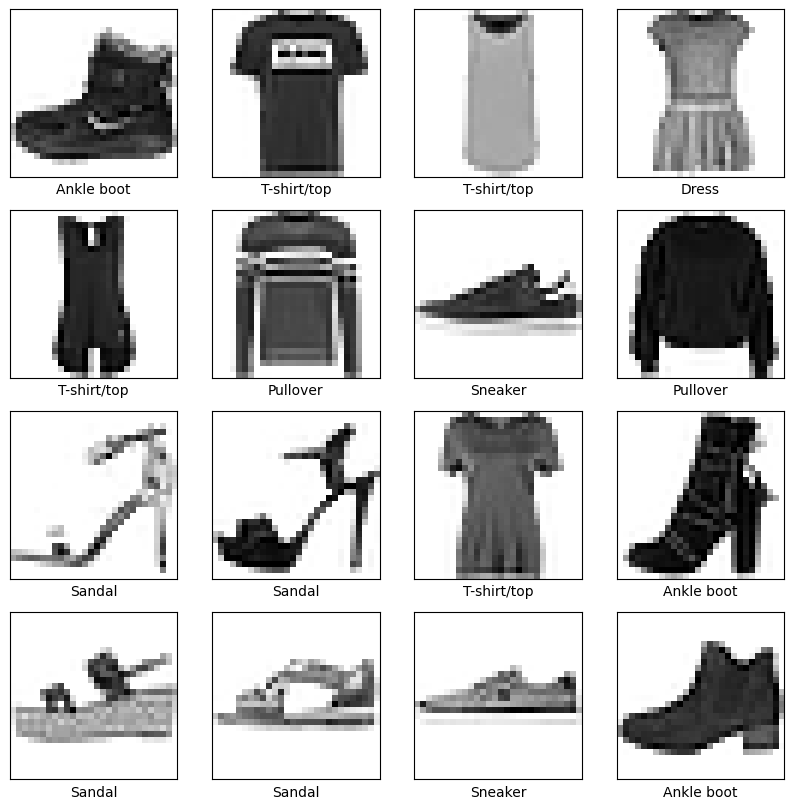

In [ ]:
#viewing the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Now we build the convolutional layer. We apply filters on the input image to extract features. In the first layer we use 31 filters whereas in the following layers we use more filters to detect more complex features. Each convolutional layer is followed by a pooling layer. It reduces the size of the feature map and helps in feature extraction. I've used 3 convolutional layers. Increasing the number of layers makes the netwrok more complex and it takes longer to run, also it starts to overfit. In the end we flatten the feature map to pass it through dense layers for classification. In dense layers each neuron is connected to every neuron the previous layer. Activation function relu is used in convolutional and dense layers(except output layer) to introduce non linearity and help the network learn complex patterns. In the final layer we use softmax to display the output as probabilities.

In [ ]:
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    #layers.Conv2D(128, (3, 3), activation='relu'),

    # Flattening the feature maps
    layers.Flatten(),

    # Fully Connected Layer
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),

    # Output Layer (10 classes)
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#It tells the model to use adam optimizer for adjusting the weights and biases of the dense layers. It tells the loss function to be minimized is "sparse categorical crossentropy",
#and to set accuracy as a metric to evaluate the model during training and testing

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)
#trains the model
#validation split splits the data into training(used to update the model's weights) and validation (used to update the model's performance after each epoch)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7213 - loss: 0.7674 - val_accuracy: 0.8665 - val_loss: 0.3764
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.8711 - loss: 0.3546 - val_accuracy: 0.8767 - val_loss: 0.3372
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.8888 - loss: 0.3023 - val_accuracy: 0.8957 - val_loss: 0.2949
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.8997 - loss: 0.2674 - val_accuracy: 0.8907 - val_loss: 0.2941
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9129 - loss: 0.2363 - val_accuracy: 0.9000 - val_loss: 0.2712
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9226 - loss: 0.2079 - val_accuracy: 0.9061 - val_loss: 0.2652
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.9309 - loss: 0.1872 - val_accuracy: 0.9112 - val_loss: 0.2480
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.9364 - loss: 0.1725 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
#evaluates the accuracy on the test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9120 - loss: 0.2644
Test Accuracy: 91.20%


Text(0.5, 1.0, 'Accuracy over Epochs')

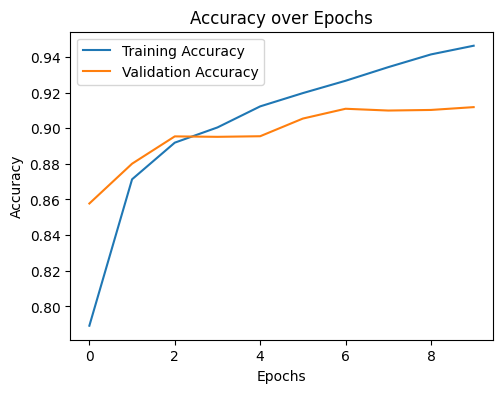

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
#we see training accuracy increases with each epoch however it's slope becomes smaller.. and validation accuracy also starts to saturate with each epoch.

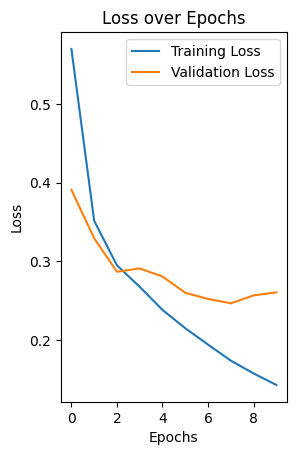

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()